# __Le pendule__ - Ben Lichtfeld SPRINTB

## __Introduction__
L'étude du pendule simple permet d'illustrer différents régimes de mouvement oscillatoire en mécanique. Pour de petits angles d'oscillation, l'approximation sin⁡$\theta$≈$\theta$ permet de linéariser l'équation différentielle du pendule. Lorsqu'une telle approximation n'est plus valable, le comportement du système dans de telles conditions peut devenir beaucoup plus complexe et même chaotique.

Dans ce travail, nous allons résoudre numériquement l'équation du mouvement du pendule en utilisant la méthode de Runge-Kutta d'ordre 4 (RK4), qui est connue comme une méthode classique dans la résolution des équations différentielles ordinaires. Nous étudierons d'abord les régimes d'amortissement du pendule libre, puis sa dynamique sous l'influence d'une force excitatrice externe. Le régime chaotique sera abordé à la fin en résolvant numériquement l'équation non linéarisée, en vérifiant sa sensibilité par rapport aux conditions initiales.

## __1. Eléments théoriques__
Le modèle étudié est un pendule simple de longueur $l$ et de masse $m$, soumis à l'intensité de pesanteur terrestre $g$. Son mouvement est décrit par l’angle $\theta(t)$, qui représente l’inclinaison du pendule par rapport à la verticale. Nous allons ici présenter les trois équations du pendule que nous allons étudier.

### __1.1 Pendule simple linéarisé avec oscillations amorties__
L'équation du pendule sans force excitatrice s'écrit : $$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0 \tag{1}
$$ 
où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide.  
Nous étudierons les différents régimes d'oscillations que l'on peut obtenir.

### __1.2 Pendule simple linéarisé avec force d'excitation__
Nous ajouterons ensuite une force d'excitation. L'équation devient alors $$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). \tag{2} $$
Nous étudierons la forme des trajectoires du pendule dans l'espace des phases.

### __1.3 Pendule non linéarisé avec force d'excitation__
Enfin, nous allons considérer que l'approximation du sinus de l'angle n'est plus valable et donc que l'équation différentielle à résoudre est $$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) \tag{3}$$
Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Nous étudierons son comportement en fonction de différentes valeurs de la force excitatrice.

## __2. Hypothèses__
Nous formulons plusieurs hypothèses pour notre modèle.

- Le pendule est modélisé comme une masse ponctuelle suspendue à un fil de longueur fixe $l$, sans élasticité ni déformation.
- Nous supposons qu’aucune autre force (comme la résistance de l'air) n'agit sur le pendule en dehors de l’amortissement linéaire $q$ et de l'éventuelle force excitatrice $F_e$.
- Le pendule oscille uniquement dans un plan vertical et ne présente pas de mouvement en dehors de ce plan : le mouvement est en 2D.

## __3. Méthode et modèle__

__Nous commenterons les résultats des sous parties de cette section en section 4.__

### __3.1. Résolution avec l'approximation des petits angles__
Nous allons résoudre l'équation (1) avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et nous traçerons sur le même graphe l'évolution de $\theta(t)$ dans ces régimes respectivement pseudo-périodique, critique et apériodique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#conditions initiales
omega = 1 #fréquence propre du pendule en rad/s
theta_0 = np.deg2rad(10) #angle initial à par rapport à la vertical
dtheta_0 = 0
q_valeurs = [1,2,5]

In [3]:
#paramètres
start = 0    # s
end = 20 # s
pas = 0.05  # s
t = np.arange(start,end+pas,pas)

In [4]:
#définition de l'équation différentielle
def pendule(y, t, q, omega):
    """
    Equation du pendule 
    """
    theta, dtheta = y #on crée un tableau contenant l'angle theta et la vitesse angulaire
    d2theta = -q * dtheta - omega**2 * theta
    return np.array([dtheta, d2theta])

In [5]:
# méthode RK4
def rk4(derivee, y0, t, q, omega):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0 #condition initiale
    #boucle pour calculer les valeurs de y aux instants t[i]
    for i in range(n - 1):
        k1 = derivee(y[i], t[i], q, omega)
        k2 = derivee(y[i] + k1 * pas / 2, t[i] + pas / 2, q, omega)
        k3 = derivee(y[i] + k2 * pas / 2, t[i] + pas / 2, q, omega)
        k4 = derivee(y[i] + k3 * pas, t[i] + pas, q, omega)
        y[i+1] = y[i] + (pas / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

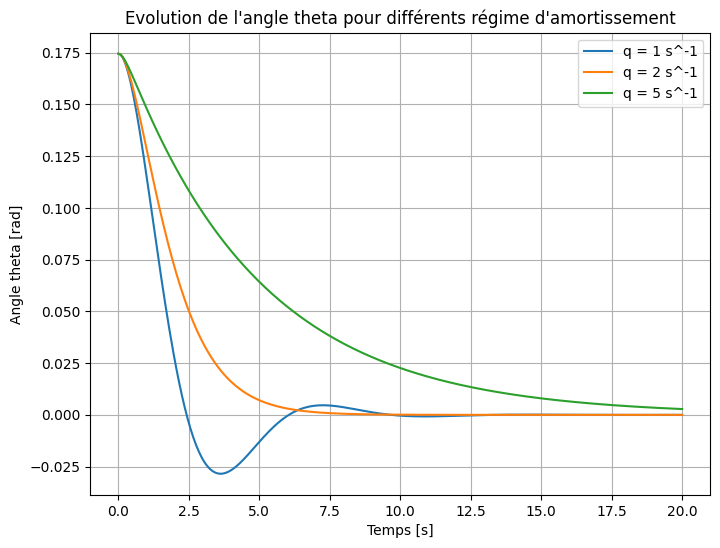

En bleu : régime pseudo-périodique 
En jaune : régime critique 
En rouge : régime apériodique 


In [6]:
#tracé des graphes
plt.figure(figsize=(8, 6))
for q in q_valeurs:
    y0 = np.array([theta_0, dtheta_0])
    y = rk4(pendule, y0, t, q, omega)
    plt.plot(t, y[:, 0], label=f"q = {q} s^-1")

plt.xlabel("Temps [s]")
plt.ylabel("Angle theta [rad]")
plt.title("Evolution de l'angle theta pour différents régime d'amortissement")
plt.grid()
plt.legend()
plt.show()
print("En bleu : régime pseudo-périodique \n"
      "En jaune : régime critique \n"
      "En rouge : régime apériodique ") 

### __3.2 Force d'excitation__
On résout à présent l'équation (2) avec la méthode RK4 pour une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.  
On va tracer sur un même graphe la trajectoire dans l'espace des phase $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour le pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$).

On prendra toujours comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

In [7]:
#params supp 
Fe = 1  #intensité de la force excitatrice (rad/s^2)
omega_e = (2 * omega) / 3  #pulsation de la force excitatrice (rad/s)

In [8]:
#définition de l'équation différentielle
def pendule_excite(y, t, q, omega, Fe, omega_e):
    """
    Equation du pendule avec force excitatrice
    """
    theta, dtheta = y #on crée un tableau contenant l'angle theta et la vitesse angulaire
    d2theta = -q * dtheta - omega**2 * theta + Fe * np.sin(omega_e * t)
    return np.array([dtheta, d2theta])

In [9]:
# méthode RK4
def rk4(derivee, y0, t, q, omega, Fe, omega_e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0 #condition initiale
    #boucle pour calculer les valeurs de y aux instants t[i]
    for i in range(n - 1):
        k1 = derivee(y[i], t[i], q, omega, Fe, omega_e)
        k2 = derivee(y[i] + k1 * pas / 2, t[i] + pas / 2, q, omega, Fe, omega_e)
        k3 = derivee(y[i] + k2 * pas / 2, t[i] + pas / 2, q, omega, Fe, omega_e)
        k4 = derivee(y[i] + k3 * pas, t[i] + pas, q, omega, Fe, omega_e)
        y[i+1] = y[i] + (pas / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

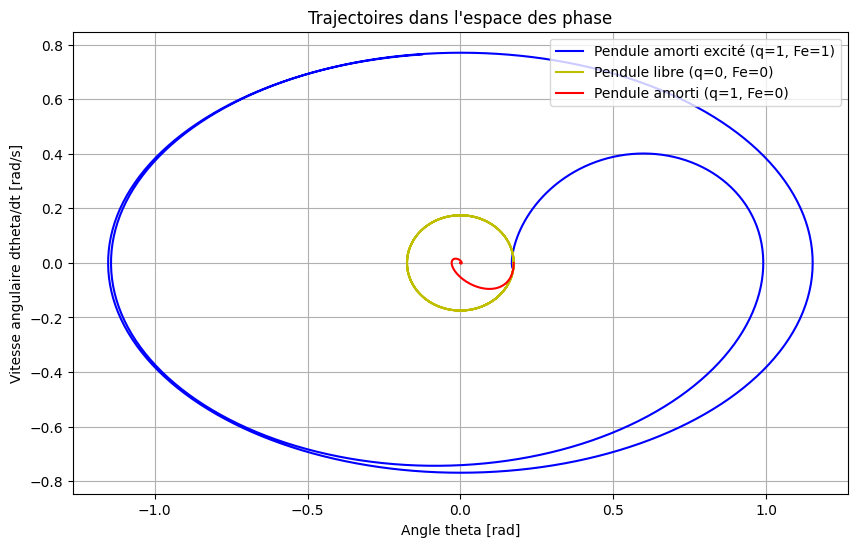

In [10]:
#tracé des trajectoires dans l’espace des phases
plt.figure(figsize=(10, 6))
y0 = np.array([theta_0, dtheta_0])

y_libre = rk4(pendule_excite, y0, t, q=0, omega=omega, Fe=0, omega_e=0)
y_amorti = rk4(pendule_excite, y0, t, q=1, omega=omega, Fe=0, omega_e=0)
y_amorti_excite = rk4(pendule_excite, y0, t, q=1, omega=omega, Fe=Fe, omega_e=omega_e)

plt.plot(y_amorti_excite[:, 0], y_amorti_excite[:, 1], 'b', label="Pendule amorti excité (q=1, Fe=1)")
plt.plot(y_libre[:, 0], y_libre[:, 1], 'y',label="Pendule libre (q=0, Fe=0)")
plt.plot(y_amorti[:, 0], y_amorti[:, 1], 'r', label="Pendule amorti (q=1, Fe=0)")
plt.xlabel("Angle theta [rad]")
plt.ylabel("Vitesse angulaire dtheta/dt [rad/s]")
plt.title("Trajectoires dans l'espace des phase")
plt.grid()
plt.legend()
plt.show()

### __3.3 Mouvement chaotique__
On résout à présent l'équation (3). Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Afin de montrer cela, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$.  
On va résoudre l'équation du mouvement non-linéaire avec la méthode RK4 pour les valeurs suivantes de l'amplitude d'excitation : $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.  
On tracera l'angle $\theta(t)$ sur un temps de $100\mathrm{~s}$.
Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, on calculera l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Nous traçerons donc la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique.  

In [11]:
#conditions initiales et paramètres
omega = 1.0 
theta_0 = np.deg2rad(10)  
dtheta_0 = 0.0
q = 0.5 
Fe_vals = [1.4, 1.44, 1.465, 1.5]  
omega_e = (2 * omega) / 3  

In [12]:
#temps
start = 0.0
end = 100.0  
pas = 0.05
t = np.arange(start, end + pas, pas)

In [13]:
def pendule_non_linearise(y, t, q, omega, Fe, omega_e):
    """
    Équation du pendule forcé non-linéaire
    """
    theta, dtheta = y
    d2theta = -q * dtheta - omega**2 * np.sin(theta) + Fe * np.sin(omega_e * t)
    return np.array([dtheta, d2theta])

In [14]:
def rk4(derivee, y0, t, q, omega, Fe, omega_e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        k1 = derivee(y[i], t[i], q, omega, Fe, omega_e)
        k2 = derivee(y[i] + k1*pas/2, t[i] + pas/2, q, omega, Fe, omega_e)
        k3 = derivee(y[i] + k2*pas/2, t[i] + pas/2, q, omega, Fe, omega_e)
        k4 = derivee(y[i] + k3*pas, t[i] + pas, q, omega, Fe, omega_e)
        
        y[i+1] = y[i] + (pas/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        #angle dans -pi, pi
        if y[i+1, 0] > np.pi:
            y[i+1, 0] -= 2*np.pi
        elif y[i+1, 0] < -np.pi:
            y[i+1, 0] += 2*np.pi
            
    return y

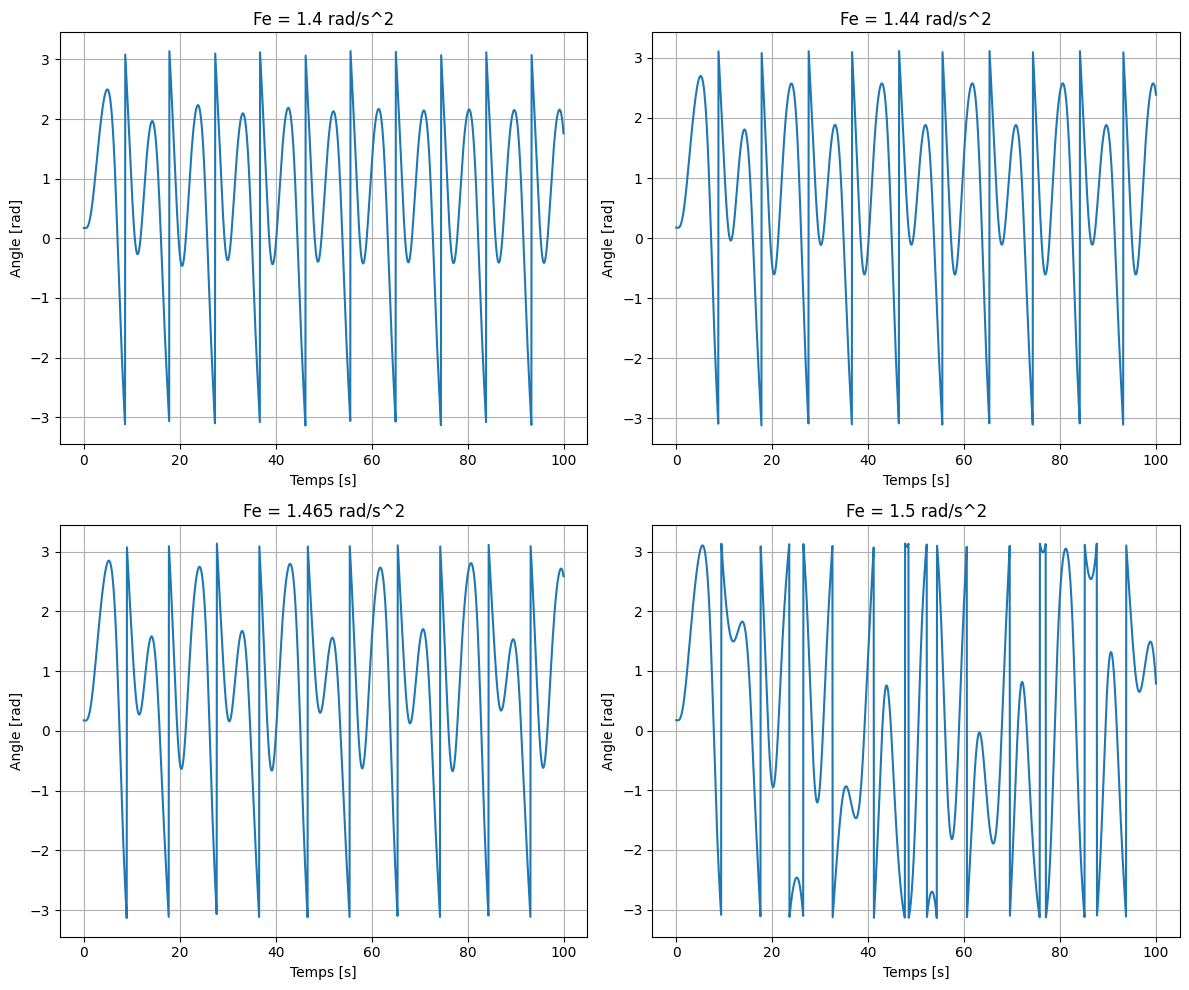

In [15]:
plt.figure(figsize=(12, 10))

for i, Fe in enumerate(Fe_vals):
    plt.subplot(2, 2, i + 1)  
    y0 = np.array([theta_0, dtheta_0])
    solution = rk4(pendule_non_linearise, y0, t, q, omega, Fe, omega_e)
    
    plt.plot(t, solution[:, 0])
    plt.title(f'Fe = {Fe} rad/s^2')
    plt.xlabel('Temps [s]')
    plt.ylabel('Angle [rad]')
    plt.grid(True)

plt.tight_layout()  
plt.show()

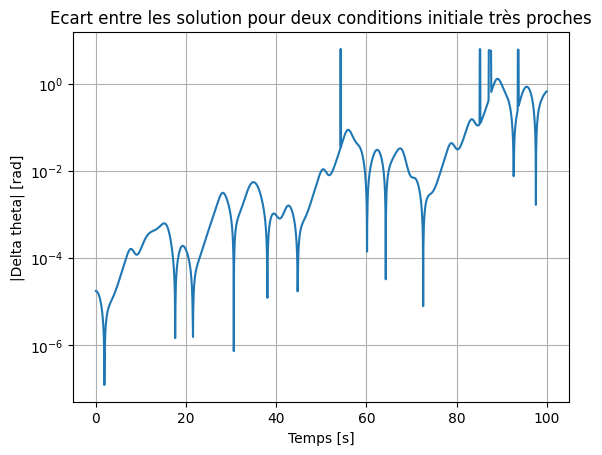

In [16]:
Fe = 1.5
theta0_1 = np.deg2rad(10)
theta0_2 = np.deg2rad(9.999) 

#calcul des deux solutions
sol1 = rk4(pendule_non_linearise, [theta0_1, dtheta_0], t, q, omega, Fe, omega_e)
sol2 = rk4(pendule_non_linearise, [theta0_2, dtheta_0], t, q, omega, Fe, omega_e)

difference = np.abs(sol1[:, 0] - sol2[:, 0])

#graphe semi-logarithmique
plt.semilogy(t, difference)
plt.title('Ecart entre les solution pour deux conditions initiale très proches')
plt.xlabel('Temps [s]')
plt.ylabel('|Delta theta| [rad]')
plt.grid()
plt.show()

## __4. Observations et analyses__

### __4.1 Approximation des petits angles__
__Régime pseudo-périodique__  
On observe que pour le régime pseudo périodique, l'angle $\theta$ décroît pendant environ 3.75 s, crôit légèrement pendant 3.75 s et converge vers 0 : le système oscille encore autour de sa position d’équilibre avant de s’arrêter progressivement. C'est bien la caractéristique du régime pseudo-périodique.  
__Régime critique__  
Pour le régime critique, on observe une décroissance (allure exponentielle décroissante) de l'angle $\theta$ vers 0. Le pendule fait un retour à l'équilibre très rapide sans oscillations.  
__Régime apériodique__  
Pour ce régime, on observe une décroissance plus lente que celle du régime critique où le pendule n'oscille pas et rejoint sa position d'équilibre.

### __4.2 Force d'excitation__

La courbe jaune est une ellipse fermée, ce qui signifie que le système oscille sans s'arrêter et sans perdre d’énergie : c'est le cas d'un oscillateur harmonique non amorti. En effet, la masse du pendule n'étant soumis qu'à des forces conservatives (ici le poids), son énergie mécanique reste constante, ce qui lui confère un mouvement "infini".

La courbe rouge montre une petite spirale qui converge rapidement vers l’origine. Le pendule perd de l'énérgie et finit par s'arrêter. C'est bien caractéristique du régime pseudo-périodique : au début, le pendule oscille, mais ces oscillations s’atténuent avec le temps. L'origine du graphe correspond à létat d'équilibre du pendule.

La courbe bleue, plus étendue, montre un comportement différent : le pendule continue à osciller plus longtemps sous l’effet d’une force excitatrice. Contrairement au cas amorti, il ne finit pas à l’origine mais atteint un équilibre dynamique où l’angle $\theta$ se stabilise autour de 0.2 rad, bien que la vitesse angulaire devienne quasi nulle.

### __4.3 Mouvement chaotique__

__Angle sous l'effet de différentes forces excitatrices__  

Les trois premiers graphe avec $F_e=\{1.4,1.44,1.465\}\mathrm{~rad\cdot s^{-2}}$ montrent une oscillation périodique mais non sinusoïdale. Ils ont la même allure. On observe des sauts (pics), indiquant que le pendule bascule très vite à certains temps. On observe également des fragments de sinusoïde, dont l'amplitude varie au fil des graphes. Plus $F_e$ augmente, plus la différence d’amplitude entre les grandes oscillations et les plus petites devient visible.    
__Cela indique donc que le pendule se rapproche de plus en plus d'un mouvement chaotique à mesure que la force excitatrice augmente.__

Sur le dernier graphe avec $F_e$ = 1.5 $\mathrm{~rad\cdot s^{-2}}$, on observe que les oscillations ne sont plus du tout périodique : le mouvement est chaotique et imprévisible. Ce comportement signifie que __des petites différences dans les conditions initiales pourraient conduire à des trajectoires complètement différentes__, comme nous l'avons vu dans le mini-projet sur l'équation logistique.  
Analysons donc cela avec le dernier graphique.

Au début (t=0), l’écart entre les deux trajectoires est très faible (=10^−6 rad). Avec le temps, l’écart grandit de plus en plus, atteignant environ 10^-1 rad et même parfois 1 rad. On peut y faire le lien, cette croissance se traduit par un exposant de Lyapunov positif.  De plus, on observe que cette croissance est irrégulière, notamment avec de nombreux pics. C'est parce que __l'équation du pendule n'est pas linéaire que le mouvement est imprévisible__.

## __Discussion et conclusion__

Cette étude a permis d'examiner les divers régimes du pendule simple, allant d'un mouvement oscillatoire amorti à un comportement chaotique sous l'influence d'une force excitatrice et une équation non linéaire. Grâce à l'application de la méthode de Runge-Kutta d'ordre 4 (RK4), nous avons pu analyser :

Le pendule libre amorti, qui tend progressivement vers l'équilibre selon trois régimes : pseudo-périodique, critique et apériodique.
Le pendule forcé, où l'application d'une excitation externe maintient des oscillations et conduit à un équilibre dynamique.
Le chaos, qui se manifeste par une perte de périodicité et une sensibilité accrue aux conditions initiales.

Une exploration plus approfondie du modèle pourrait inclure : un diagramme de bifurcation et le calcul de l'exposant de Lyapunov afin d'observer la transition vers le régime chaotique (comme dans le mini projet 2).